In [108]:
import numpy as np # importando numpy
import pandas as pd #importando pandas
import matplotlib.pyplot as plt # importando matplotlib

In [2]:
muestra = np.array( [[1.85, 1.8, 1.8 , 1.8],
                    [1.73,  1.7, 1.75, 1.76],
                    [ 1.65, 1.69,  1.67 ,  1.6],
                    [1.54,  1.57, 1.58, 1.59],
                    [ 1.4 , 1.42,  1.45, 1.48]]) 

In [14]:
muestra_1 = muestra.flatten()

**Media aritmética de la muestra**

$$\bar{x} = \sum_{i} \frac{x_{i}}{n}$$

In [16]:
muestra.mean()

1.6415

In [17]:
np.mean(muestra)

1.6415

In [61]:
def media(datos):
    return sum(datos) / len(datos)

media(muestra_1)

1.6415

In [26]:
def media(arreglo):
   # numeros = []
   # for fila in arreglo:
   #    for numero in fila:
   #       numeros.append(numero)
   numeros = [numero for fila in arreglo for numero in fila]
   suma = 0
   for cantidad, numero in enumerate(numeros, 1):
      suma += numero
   promedio = suma / cantidad
  
   return promedio

media(muestra)

1.6415

### Promedio ponderado

$$\bar{x}_w = \frac{\sum_{i=1}^{n} w_{i}x_{i}}{\sum_{i=1}^{n} w_{i}}$$

In [ ]:
def promedio_ponderado(datos, pesos):
    numerador = sum([datos[i] * pesos[i] for i in range(len(datos))])
    denominador = sum(pesos)
    
    return numerador / denominador

## Mediana

$$
 mediana = 
  \begin{cases} 
   \frac{x_{[n+1]}}{2} & \text{si } n \text{ es impar}\\
   \frac{x_{[x/2]} + x_{[x/2] + 1}}{2}       & \text{si } n \text{ es par}
  \end{cases}
$$

In [63]:
np.median(muestra)

1.66

In [64]:
def mediana(datos):
    datos_ordenados = sorted(datos)
    if len(datos_ordenados) % 2 == 1:
        return (len(datos_ordenados) + 1)/2
    else:
        posicion = len(datos_ordenados)/2
        return (datos_ordenados[int(posicion)-1] + datos_ordenados[int(posicion)])/2

In [66]:
mediana(muestra_1)

1.66

## Moda

In [94]:
def moda(arreglo):
   numeros = [numero for fila in arreglo for numero in fila] #Paso la matriz a una lista
   unicos = list(set(numeros)) #Obtengo valores únicos
   moda, maximo = 0,0
   for indice, numero in enumerate(unicos):
      conteo = numeros.count(numero) #Busco la mayor repetición de ese valor
      if conteo > maximo:
         maximo = conteo
         moda = unicos[indice]
   return moda

In [97]:
moda(muestra)

1.8

### La Varianza

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_{i} - \mu)^2 $$

In [102]:
muestra.var()

0.017642750000000006

In [101]:
np.var(muestra)

0.017642750000000006

In [83]:
def varianza(datos):
    media = np.mean(datos)
    diferencias = [(i - media)**2 for i in datos]
    suma = sum(diferencias)
    return suma/len(datos)


In [84]:
varianza(muestra_1)

0.017642750000000006

### La Desviación Estándar

$$\sigma = \sqrt{\sigma^2} = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_{i} - \mu)^2 }$$

In [103]:
muestra.std()

0.13282601401833907

In [104]:
np.std(muestra)

0.13282601401833907

In [87]:
def desviacion_estandar(datos):
    var = varianza(datos)
    return np.sqrt(var)

In [88]:
desviacion_estandar(muestra_1)

0.13282601401833907

In [106]:
#Coeficiente de v ariacion
(np.std(muestra) / np.mean(muestra)) * 100

8.09174620885404

# 2.

In [67]:
diccionario = {"Ingreso en miles": [10.5, 6.8, 20.7, 18.2, 8.6, 25.8, 22.2, 5.9, 7.6, 11.8],
        "Años de estudio": [17, 18, 21, 16, 16, 21, 16, 14, 18, 18]}

In [68]:
dF = pd.DataFrame(diccionario)

In [69]:
dF.rename({'Ingreso en miles': 'Ingreso_en_miles',
            'Años de estudio' : 'Años_de_estudio'}, axis=1, inplace=True)

In [70]:
dF

,Ingreso_en_miles,Años_de_estudio
0,10.5,17
1,6.8,18
2,20.7,21
3,18.2,16
4,8.6,16
5,25.8,21
6,22.2,16
7,5.9,14
8,7.6,18
9,11.8,18


In [107]:
dF.describe()

,Ingreso_en_miles,Años_de_estudio
count,10.000000,10.000000
mean,13.810000,17.500000
std,7.251889,2.223611
min,5.900000,14.000000
25%,7.850000,16.000000
50%,11.150000,17.500000
75%,20.075000,18.000000
max,25.800000,21.000000


In [71]:
dF.mean()

Ingreso_en_miles    13.81
Años_de_estudio     17.50
dtype: float64

In [72]:
dF.median()

Ingreso_en_miles    11.15
Años_de_estudio     17.50
dtype: float64

In [73]:
dF.mode()

,Ingreso_en_miles,Años_de_estudio
0,5.9,16.0
1,6.8,18.0
2,7.6,NaN
3,8.6,NaN
4,10.5,NaN
5,11.8,NaN
6,18.2,NaN
7,20.7,NaN
8,22.2,NaN
9,25.8,NaN


(array([4., 2., 0., 1., 2., 1.]),
 array([ 5.9       ,  9.21666667, 12.53333333, 15.85      , 19.16666667,
        22.48333333, 25.8       ]),
 <BarContainer object of 6 artists>)

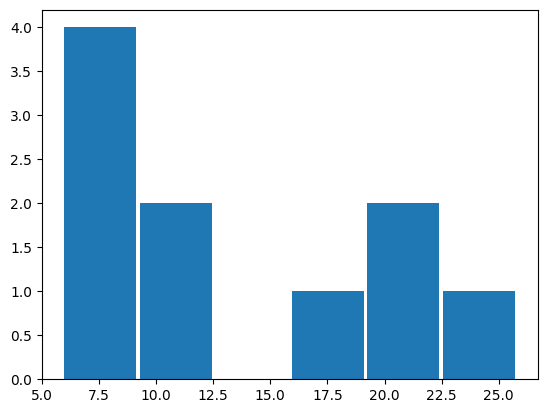

In [109]:
plt.hist(dF.Ingreso_en_miles, bins=6, rwidth=0.95)

(array([1., 3., 1., 3., 0., 2.]),
 array([14.        , 15.16666667, 16.33333333, 17.5       , 18.66666667,
        19.83333333, 21.        ]),
 <BarContainer object of 6 artists>)

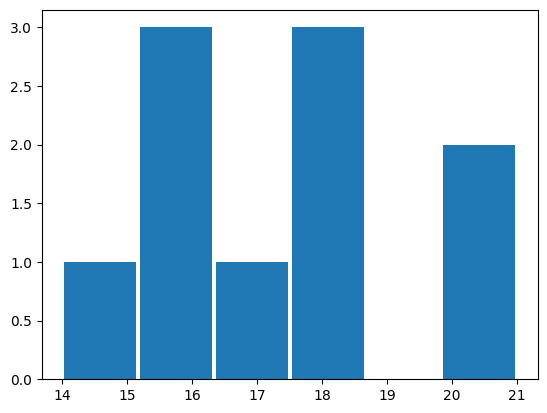

In [110]:
plt.hist(dF.Años_de_estudio, bins=6, rwidth=0.95)

In [111]:
round(dF.Ingreso_en_miles.mean(), 2)

13.81